# DATA PROCESSING OF THE ASAP DATASET 

This code file called "data_processing.ipynb" serves as a crucial step in the development of an automated essay grading model. It primarily focuses on data cleaning, preprocessing, and extracting essential features from the ASAP Dataset. The resulting processed data is then stored in a CSV file named "processed.csv." This cleaned and feature-enriched dataset will be utilized as input in the subsequent code file called "model_training.ipynb" responsible for building and training the automated essay grading model.

IMPORTING LIBRARIES

In [1]:
# Importing necessary libraries
import zipfile  # For working with zip files
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
%matplotlib inline
import re  # For regular expressions
from spellchecker import SpellChecker  # For spell checking
import warnings  # For suppressing warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from collections import Counter  # For counting elements in a list

import nltk  # Natural Language Toolkit for NLP tasks
from nltk.corpus import stopwords  # For stop words
from nltk.tokenize import word_tokenize  # For word tokenization
from nltk import pos_tag  # For part-of-speech tagging

# Downloading required NLTK resources for text processing
nltk.download('averaged_perceptron_tagger')  # Downloading POS tagger
nltk.download('punkt')  # Downloading the Punkt tokenizer
nltk.download('stopwords')  # Downloading stop words for text preprocessing


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yabio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yabio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yabio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

READING DATA

In [2]:
# Read the training data from a zip file into a pandas DataFrame.

with zipfile.ZipFile("./Dataset.zip") as z:
    with z.open("training_set_rel3.tsv") as t:
        train_data = pd.read_csv(t, sep='\t', encoding='latin-1')

DATA EXPLORATION AND CLEANING

In [3]:
# Display the first few rows of the training data DataFrame.
train_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Generate summary statistics of the training data DataFrame.
train_data.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [5]:
# Count and display the number of missing values (NaN) in each column of the training data.
train_data.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [6]:
# Remove columns with missing values and display information about the updated DataFrame.
train_data.dropna(axis=1,inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   essay_id        12976 non-null  int64 
 1   essay_set       12976 non-null  int64 
 2   essay           12976 non-null  object
 3   rater1_domain1  12976 non-null  int64 
 4   rater2_domain1  12976 non-null  int64 
 5   domain1_score   12976 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 608.4+ KB


In [7]:
train_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [8]:
train_data.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,4.127158,4.137408,6.800247
std,6309.074105,2.136913,4.212544,4.264330,8.970705
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,2.000000,2.000000
50%,10044.500000,4.000000,3.000000,3.000000,3.000000
75%,15681.250000,6.000000,4.000000,4.000000,8.000000
max,21633.000000,8.000000,30.000000,30.000000,60.000000


In [9]:
# Loop through essay sets and calculate the minimum and maximum domain1 scores for each set.
for set_num in range(1, 9):
    set_scores = train_data[train_data['essay_set'] == set_num]['domain1_score']
    print("The minimum domain1 score for set{} is {} and the maximum domain1 score is {}".format(set_num, min(set_scores), max(set_scores)))

The minimum domain1 score for set1 is 2 and the maximum domain1 score is 12
The minimum domain1 score for set2 is 1 and the maximum domain1 score is 6
The minimum domain1 score for set3 is 0 and the maximum domain1 score is 3
The minimum domain1 score for set4 is 0 and the maximum domain1 score is 3
The minimum domain1 score for set5 is 0 and the maximum domain1 score is 4
The minimum domain1 score for set6 is 0 and the maximum domain1 score is 4
The minimum domain1 score for set7 is 2 and the maximum domain1 score is 24
The minimum domain1 score for set8 is 10 and the maximum domain1 score is 60


<Axes: xlabel='domain1_score', ylabel='Count'>

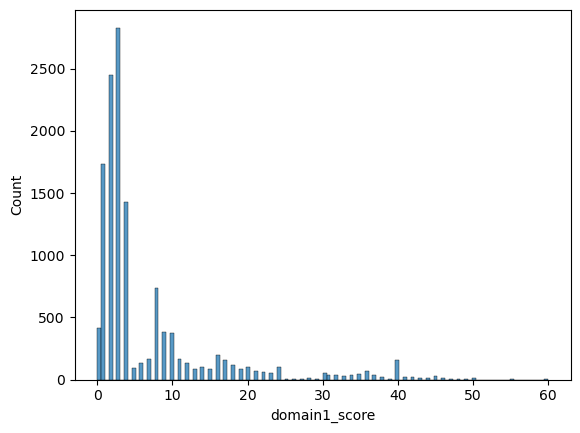

In [10]:
# Visualize the distribution of domain1 scores to check for skewness.
sns.histplot(train_data['domain1_score'])

In [11]:
# Remove unnecessary columns and rename 'domain1_score' to 'grade' for clarity.
train_data.drop(columns=['rater1_domain1', 'rater2_domain1'],axis=1,inplace=True)
train_data.rename(columns={'domain1_score': 'grade'}, inplace=True)

In [12]:
train_data.head()

,essay_id,essay_set,essay,grade
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


PREPROCESSING

In [13]:
def preprocess_and_tokenize_essay(essay):

    """
    Preprocess the essay by removing words starting with "@", removing stop words, and tokenizing into sentences and words.

    Args:
        essay (str): The input essay text.

    Returns:
        list of list of str: A list of tokenized sentences, where each sentence is a list of tokenized words.
    """

    # Clean the essay by removing words starting with "@"
    x = [i for i in essay.split() if not i.startswith("@")]
    removed_words = ' '.join(x)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(removed_words)
    filtered_words = [w for w in word_tokens if w not in stop_words]
    
    # Tokenize into sentences
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(' '.join(filtered_words))
    
    # Remove punctuation and tokenize words
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentence_words = re.sub("[^A-Za-z0-9]", " ", raw_sentence)
            words = nltk.word_tokenize(sentence_words)
            filtered_sentence_words = [w for w in words if w]
            sentences.append(filtered_sentence_words)
    
    return sentences


FEATURE EXTRACTION

In [14]:
def count_sentences(essay):
    """
    Count the number of sentences in the essay after preprocessing.

    Args:
        essay (str): The input essay text.

    Returns:
        int: The count of sentences.
    """
    sentences = preprocess_and_tokenize_essay(essay)
    return len(sentences)

def count_words(essay):
    """
    Count the number of words in the essay after preprocessing.

    Args:
        essay (str): The input essay text.

    Returns:
        int: The count of words.
    """
    sentences = preprocess_and_tokenize_essay(essay)
    word_count = sum(len(sentence) for sentence in sentences)
    return word_count

def count_unique_words(essay):
    """
    Count the number of unique words in the essay after preprocessing.

    Args:
        essay (str): The input essay text.

    Returns:
        int: The count of unique words.
    """ 
    sentences = preprocess_and_tokenize_essay(essay)
    all_words = [word for sentence in sentences for word in sentence]
    unique_word_count = len(set(all_words))
    return unique_word_count

def count_characters(essay):
    """
    Count the number of characters in the essay after preprocessing.

    Args:
        essay (str): The input essay text.

    Returns:
        int: The count of characters.
    """
    cleaned_essay = preprocess_and_tokenize_essay(essay)
    all_words = [word for sentence in cleaned_essay for word in sentence]
    total_characters = sum(len(word) for word in all_words)
    return total_characters

def calculate_average_word_length(essay):
    """
    Calculates the average word length in the essay after preprocessing.

    Args:
        essay (str): The input essay text.

    Returns:
        int: The average word length of essays.
    """
    cleaned_essay = preprocess_and_tokenize_essay(essay)
    all_words = [word for sentence in cleaned_essay for word in sentence]
    total_characters = sum(len(word) for word in all_words)
    total_words = len(all_words)
    if total_words > 0:
        average_word_length = total_characters / total_words
        return average_word_length
    else:
        return 0

def extract_most_common_words(essay, num_words=10):
    """
    Extracts the most common words from the preprocessed essay.

    Args:
        essay (str): The input essay text.
        num_words (int): The number of most common words to extract (default is 10).

    Returns:
        list: A list of tuples containing the most common words and their frequencies.
    """
    sentences = preprocess_and_tokenize_essay(essay)
    all_words = [word for sentence in sentences for word in sentence]
    word_counter = Counter(all_words)
    most_common_words = word_counter.most_common(num_words)
    return most_common_words

def count_pos(essay):
    """
    Count parts of speech (POS) in the preprocessed essay.

    Args:
        essay (str): The input essay text.

    Returns:
        tuple: A tuple containing counts of different POS tags (Nouns, Verbs, Adjectives, Adverbs, Pronouns,
        Prepositions, Conjunctions, and Determiners).
    """
    sentences = preprocess_and_tokenize_essay(essay)
    
    noun_count = 0
    verb_count = 0
    adj_count = 0
    adverb_count = 0
    pronoun_count = 0
    preposition_count = 0
    conjunction_count = 0
    determiner_count = 0
    
    for sentence in sentences:
        pos_sentence = nltk.pos_tag(sentence)
        for word, pos_tag in pos_sentence:
            if pos_tag.startswith('N'):
                noun_count += 1
            elif pos_tag.startswith('V'):
                verb_count += 1
            elif pos_tag.startswith('J'):
                adj_count += 1
            elif pos_tag.startswith('R'):
                adverb_count += 1
            elif pos_tag.startswith('P'):
                pronoun_count += 1
            elif pos_tag.startswith('IN'):
                preposition_count += 1
            elif pos_tag.startswith('CC'):
                conjunction_count += 1
            elif pos_tag.startswith('DT'):
                determiner_count += 1
            elif pos_tag.startswith('PDT'):
                determiner_count += 1
            elif pos_tag.startswith('WDT'):
                determiner_count += 1
            
    return noun_count, verb_count, adj_count, adverb_count, pronoun_count, preposition_count, conjunction_count, determiner_count

def count_spelling_errors(essay):
    """
    Count the spelling errors in the preprocessed essay.

    Args:
        essay (str): The input essay text.

    Returns:
        int: The count of misspelled words.
    """
    # Initialize a spell checker
    spell_checker = SpellChecker()

    # Tokenize the essay into words
    sentences = preprocess_and_tokenize_essay(essay)
    
    # Count the number of misspelled words
    misspelled_count = 0
    for sentence in sentences:
        for word in sentence:
            if word and not spell_checker.correction(word) == word:
                misspelled_count += 1
    
    return misspelled_count


def find_misspelled_words(essay):
    """
    Find and return misspelled words in the preprocessed essay along with their positions.

    Args:
        essay (str): The input essay text.

    Returns:
        list: A list of tuples, where each tuple contains a misspelled word and its position.
    """
    # Initialize a spell checker using English dictionary
    spell_checker = SpellChecker()
    
    # Tokenize the essay into words
    sentences = preprocess_and_tokenize_essay(essay)
    
    # Find and store misspelled words along with their positions
    misspelled_words = []
    for sentence in sentences:
        for idx, word in enumerate(sentence):
            if not spell_checker.correction(word) == word:
                misspelled_words.append((word, idx))
    
    return misspelled_words


In [15]:
# Print the first essay in the dataset
print(train_data.essay[0])

Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy

In [16]:
# Sample essay
sample_essay = train_data.essay[0]

# Test count_sentences function
sentence_count = count_sentences(sample_essay)
print("Number of sentences:", sentence_count)

# Test count_words function
word_count = count_words(sample_essay)
print("Number of words:", word_count)

# Test count_unique_words function
unique_word_count = count_unique_words(sample_essay)
print("Number of unique words:", unique_word_count)

# Test count_characters function
character_count = count_characters(sample_essay)
print("Number of characters:", character_count)

# Test calculate_average_word_length function
average_word_length = calculate_average_word_length(sample_essay)
print("Average word length:", average_word_length)

# Test count_pos function
noun_count, verb_count, adj_count, adverb_count, pronoun_count, preposition_count, conjunction_count, determiner_count = count_pos(sample_essay)
print("Noun count:", noun_count)
print("Verb count:", verb_count)
print("Adjective count:", adj_count)
print("Adverb count:", adverb_count)
print("Pronoun count:", pronoun_count)
print("Preposition count:", preposition_count)
print("Conjunction count:", conjunction_count)
print("Determiner count:", determiner_count)

# Test count_spelling_errors function
misspelled_count = count_spelling_errors(sample_essay)
print("Number of spelling errors:", misspelled_count)

# Test find_misspelled_errors function
misspelled_words = find_misspelled_words(sample_essay)

if misspelled_words:
    print("Misspelled words:")
    for word, position in misspelled_words:
        print(f"Word: '{word}', Position: {position}")
else:
    print("No misspelled words found.")


Number of sentences: 16
Number of words: 179
Number of unique words: 118
Number of characters: 935
Average word length: 5.223463687150838
Noun count: 71
Verb count: 43
Adjective count: 25
Adverb count: 15
Pronoun count: 13
Preposition count: 5
Conjunction count: 0
Determiner count: 0
Number of spelling errors: 12
Misspelled words:
Word: 'troble', Position: 26
Word: 'buisness', Position: 5
Word: 's', Position: 1
Word: 'ect', Position: 11
Word: 'countrys', Position: 2
Word: 's', Position: 4
Word: 'll', Position: 15
Word: 's', Position: 6
Word: 'perpressured', Position: 10
Word: 'isnt', Position: 13
Word: 'forbidde', Position: 4
Word: 'troble', Position: 25


In [17]:
train_data.head(1)

,essay_id,essay_set,essay,grade
0,1,1,"Dear local newspaper, I think effects computer...",8


In [18]:
df = train_data.copy() # Create a copy of the training data dataframe

# Apply preprocessing and tokenization to essays, and calculate various essay statistics
df['token_essay'] = df['essay'].apply(preprocess_and_tokenize_essay)
df['sentence_count'] = df['essay'].apply(count_sentences)
df['word_count'] = df['essay'].apply(count_words)
df['unique_word_count'] = df['essay'].apply(count_unique_words)
df['character_count'] = df['essay'].apply(count_characters)
df['average_word_length'] = df['essay'].apply(calculate_average_word_length)

# Apply part-of-speech tagging and count different parts of speech in essays
df[['noun_count', 'verb_count', 'adj_count', 'adverb_count', 'pronoun_count', 'preposition_count', 'conjunction_count', 'determiner_count']] = df['essay'].apply(count_pos).apply(pd.Series)

# Count misspelled words in essays
df['misspelled_count'] = df['essay'].apply(count_spelling_errors)



SAVING PROCESSED DATA

In [19]:
# Save the processed dataframe to a CSV file
df.to_csv("processed.csv")

In [20]:
#This is the new dataset that would be used for the model training and evaluation
df.head()

,essay_id,essay_set,essay,grade,token_essay,sentence_count,word_count,unique_word_count,character_count,average_word_length,noun_count,verb_count,adj_count,adverb_count,pronoun_count,preposition_count,conjunction_count,determiner_count,misspelled_count
0,1,1,"Dear local newspaper, I think effects computer...",8,"[[Dear, local, newspaper, I, think, effects, c...",16,179,118,935,5.223464,71,43,25,15,13,5,0,0,12
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,"[[Dear, I, believe, using, computers, benefit,...",17,235,141,1249,5.314894,98,63,25,13,15,8,0,4,17
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,"[[Dear, More, people, use, computers, everyone...",14,147,105,816,5.551020,73,35,23,3,3,2,0,3,8
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,"[[Dear, Local, Newspaper, I, found, many, expe...",26,283,186,1678,5.929329,141,61,37,14,5,9,0,5,27
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,"[[Dear, I, know, computers, positive, effect, ...",30,258,148,1391,5.391473,118,49,24,16,5,10,0,15,20
